## Import des librairies ##

In [4]:
#Imports librairies de base
import numpy as np
import pandas as pd

#Affichage de Graphes
from IPython.display import Markdown, display, HTML
import matplotlib.pyplot as plt

#Information Mutuelle
from sklearn.feature_selection import mutual_info_regression

from google.colab import files
data_to_load = files.upload()


Saving passagers.csv to passagers (1).csv
Saving test.csv to test.csv


## 1. Lecture des données ##

1.1 Charger les données d'apprentissage (Data/passagers.csv) dans un DataFrame nommé train. Afficher 10 exemples.

In [9]:
# Chargement du fichier CSV dans un DataFrame
train = pd.read_csv("passagers.csv")

# Afficher 10 exemples aléatoires
train.sample(10, random_state=42)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
709,710,1,3,"Moubarek, Master. Halim Gonios (""William George"")",male,NaN,1,1,2661,15.2458,NaN,C
439,440,0,2,"Kvillner, Mr. Johan Henrik Johannesson",male,31.0,0,0,C.A. 18723,10.5000,NaN,S
840,841,0,3,"Alhomaki, Mr. Ilmari Rudolf",male,20.0,0,0,SOTON/O2 3101287,7.9250,NaN,S
720,721,1,2,"Harper, Miss. Annie Jessie ""Nina""",female,6.0,0,1,248727,33.0000,NaN,S
39,40,1,3,"Nicola-Yarred, Miss. Jamila",female,14.0,1,0,2651,11.2417,NaN,C
290,291,1,1,"Barber, Miss. Ellen ""Nellie""",female,26.0,0,0,19877,78.8500,NaN,S
300,301,1,3,"Kelly, Miss. Anna Katherine ""Annie Kate""",female,NaN,0,0,9234,7.7500,NaN,Q
333,334,0,3,"Vander Planke, Mr. Leo Edmondus",male,16.0,2,0,345764,18.0000,NaN,S
208,209,1,3,"Carr, Miss. Helen ""Ellen""",female,16.0,0,0,367231,7.7500,NaN,Q
136,137,1,1,"Newsom, Miss. Helen Monypeny",female,19.0,0,2,11752,26.2833,D47,S


1.2 Charger les données d'apprentissage (Data/test.csv) dans un Dataframe nommé test. Afficher 10 exemples.

In [10]:
# Chargement du fichier test.csv dans un DataFrame nommé test
test = pd.read_csv("test.csv")

# Afficher 10 exemples aléatoires du jeu de test
test.sample(10, random_state=42)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
321,1213,3,"Krekorian, Mr. Neshan",male,25.0,0,0,2654,7.2292,F E57,C
324,1216,1,"Kreuchen, Miss. Emilie",female,39.0,0,0,24160,211.3375,NaN,S
388,1280,3,"Canavan, Mr. Patrick",male,21.0,0,0,364858,7.7500,NaN,Q
56,948,3,"Cor, Mr. Bartol",male,35.0,0,0,349230,7.8958,NaN,S
153,1045,3,"Klasen, Mrs. (Hulda Kristina Eugenia Lofqvist)",female,36.0,0,2,350405,12.1833,NaN,S
30,922,2,"Louch, Mr. Charles Alexander",male,50.0,1,0,SC/AH 3085,26.0000,NaN,S
72,964,3,"Nieminen, Miss. Manta Josefina",female,29.0,0,0,3101297,7.9250,NaN,S
82,974,1,"Case, Mr. Howard Brown",male,49.0,0,0,19924,26.0000,NaN,S
258,1150,2,"Bentham, Miss. Lilian W",female,19.0,0,0,28404,13.0000,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


1.3 Afficher les informations des deux DataFrames train et Test.

In [11]:
# Chargement des fichiers CSV
train = pd.read_csv("passagers.csv")
test = pd.read_csv("test.csv")

# Afficher les informations sur les deux DataFrames
print("=== Informations sur le DataFrame train ===")
train.info()

print("\n=== Informations sur le DataFrame test ===")
test.info()

=== Informations sur le DataFrame train ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB

=== Informations sur le DataFrame test ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ----

1.4 Calculer le taux global de survie

In [12]:
taux_survie = train["Survived"].mean() * 100
print(f"Taux global de survie : {taux_survie:.2f}%")

Taux global de survie : 38.38%


#### Question 1 : Quel Travail voyez-vous pour que les données soient prêtes à faire tourner dans un modèle ?
Identifier les valeurs manquantes (NaN).
Supprimer ou imputer ces valeurs (moyenne, médiane, ou catégorie la plus fréquente).
Corriger les incohérences (ex. âge négatif, doublons, etc.).

Inspection	Identifier les problèmes	.info(), .isnull().sum()
Nettoyage	Supprimer ou imputer les valeurs manquantes	fillna()
Simplification	Supprimer les colonnes inutiles	drop()
Encodage	Convertir texte → numérique	pd.get_dummies()
Mise à l’échelle	Harmoniser les valeurs	StandardScaler()
Séparation	Créer X et y	train_test_split()

#### Question 2 : Quelle différence y-a-t'il entre les données train et les données test ?
train contient une colonne supplémentaire : Survived (la variable cible, indiquant si le passager a survécu ou non).
test est utilisé pour évaluer les performances du modèle, car il ne contient pas la variable cible. Le but est de prédire Survived pour ces passagers.



#### Question 3 : Quel est le rôle de ces deux sets de données ?
train nous permet d'évaluer et test nous permet de faire des modifications puis de comparer avec train qui possède des données réelles.



## 2. Analyse des features

2.1 Analyser l'effet de la variable Classe sur le taux de survie, en affichant le % de survie par classe

In [13]:
# Calculer le taux de survie par classe (Pclass)
survival_by_class = train.groupby('Pclass')['Survived'].agg(['mean', 'count'])

# Convertir la moyenne en pourcentage
survival_by_class['mean'] = survival_by_class['mean'] * 100

# Renommer les colonnes pour plus de clarté
survival_by_class.rename(
    columns={'mean': 'Survival Rate (%)', 'count': 'Number of Passengers'},
    inplace=True
)

# Afficher le résultat
survival_by_class

,Survival Rate (%),Number of Passengers
Pclass,,
1,62.962963,216
2,47.282609,184
3,24.236253,491


2.2 Analyser l'effet de la variable Genre (Sex) sur le taux de survie, en affichant le % de survie par classe

In [16]:
# Analyser l'effet du genre (Sex) sur le taux de survie par classe
survival_by_sex_class = train.groupby(['Sex', 'Pclass'])['Survived'].agg(['mean', 'count'])

# Convertir la moyenne en pourcentage
survival_by_sex_class['mean'] = survival_by_sex_class['mean'] * 100

# Renommer les colonnes pour plus de clarté
survival_by_sex_class.rename(
    columns={'mean': 'Survival Rate (%)', 'count': 'Number of Passengers'},
    inplace=True
)

# Réorganiser pour une meilleure lisibilité
survival_by_sex_class = survival_by_sex_class.reset_index()
survival_by_sex_class

,Sex,Pclass,Survival Rate (%),Number of Passengers
0,female,1,96.808511,94
1,female,2,92.105263,76
2,female,3,50.000000,144
3,male,1,36.885246,122
4,male,2,15.740741,108
5,male,3,13.544669,347


2.3 Calculer une nouvelle colonne FamilySize contenant la taille de la famille, pour les DataFrame train et Test. Afficher pour 10 exemples l'Id du passager, le nom, l'age, le sexe et la taille de la famille.

In [17]:
# Ajouter la colonne FamilySize pour train
train['FamilySize'] = train['SibSp'] + train['Parch'] + 1  # +1 pour inclure le passager lui-même

# Ajouter la colonne FamilySize pour test
test['FamilySize'] = test['SibSp'] + test['Parch'] + 1

# Afficher 10 exemples pour train
train_examples = train[['PassengerId', 'Name', 'Age', 'Sex', 'FamilySize']].sample(10, random_state=42)
print("Exemples pour train :")
print(train_examples)

# Afficher 10 exemples pour test
test_examples = test[['PassengerId', 'Name', 'Age', 'Sex', 'FamilySize']].sample(10, random_state=42)
print("\nExemples pour test :")
print(test_examples)

Exemples pour train :
     PassengerId                                               Name   Age  \
709          710  Moubarek, Master. Halim Gonios ("William George")   NaN   
439          440             Kvillner, Mr. Johan Henrik Johannesson  31.0   
840          841                        Alhomaki, Mr. Ilmari Rudolf  20.0   
720          721                  Harper, Miss. Annie Jessie "Nina"   6.0   
39            40                        Nicola-Yarred, Miss. Jamila  14.0   
290          291                       Barber, Miss. Ellen "Nellie"  26.0   
300          301           Kelly, Miss. Anna Katherine "Annie Kate"   NaN   
333          334                    Vander Planke, Mr. Leo Edmondus  16.0   
208          209                          Carr, Miss. Helen "Ellen"  16.0   
136          137                       Newsom, Miss. Helen Monypeny  19.0   

        Sex  FamilySize  
709    male           3  
439    male           1  
840    male           1  
720  female           2  


2.4 Visualisez le nombre de personnes et le taux de survie par taille de famille.

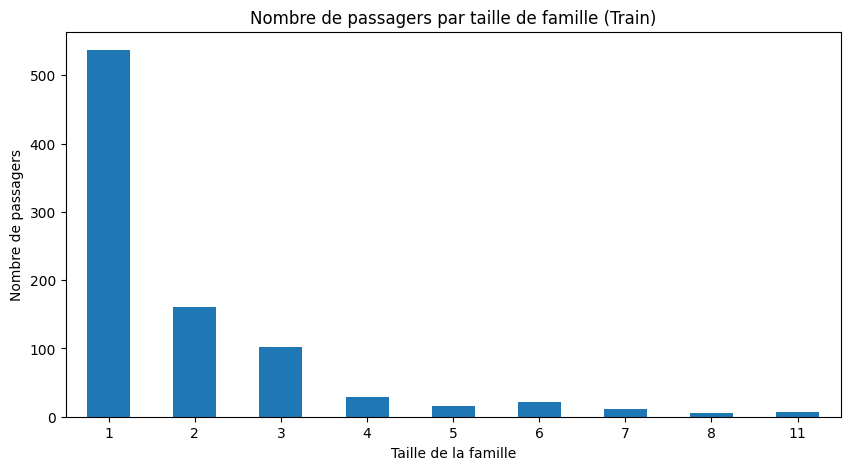

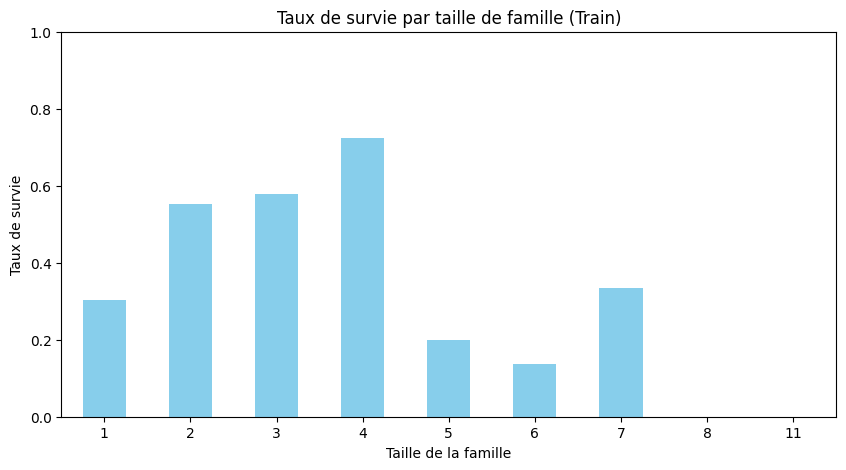

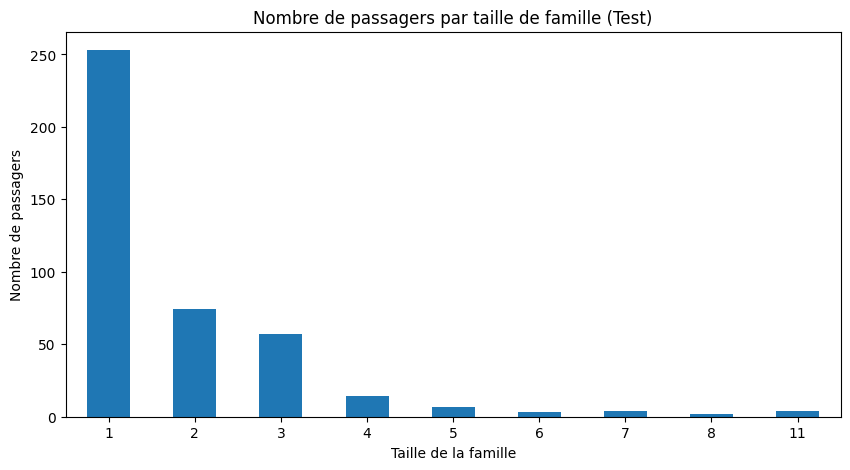

In [25]:
# Visualiser le nombre de personnes par taille de famille pour train
plt.figure(figsize=(10, 5))
train['FamilySize'].value_counts().sort_index().plot(kind='bar')
plt.title('Nombre de passagers par taille de famille (Train)')
plt.xlabel('Taille de la famille')
plt.ylabel('Nombre de passagers')
plt.xticks(rotation=0)
plt.show()

# Visualiser le taux de survie par taille de famille pour train
plt.figure(figsize=(10, 5))
train.groupby('FamilySize')['Survived'].mean().plot(kind='bar', color='skyblue')
plt.title('Taux de survie par taille de famille (Train)')
plt.xlabel('Taille de la famille')
plt.ylabel('Taux de survie')
plt.xticks(rotation=0)
plt.ylim(0, 1) # Set y-axis limit from 0 to 1 for survival rate
plt.show()

# Visualiser le nombre de personnes par taille de famille pour test
plt.figure(figsize=(10, 5))
test['FamilySize'].value_counts().sort_index().plot(kind='bar')
plt.title('Nombre de passagers par taille de famille (Test)')
plt.xlabel('Taille de la famille')
plt.ylabel('Nombre de passagers')
plt.xticks(rotation=0)
plt.show()

2.5 Calculer une nouvelle colonne IsAlone indiquant si le passager est seul ou pas, pour les DataFrame train et Test. Afficher pour 10 exemples l'Id du passager, le nom, l'age, le sexe et le status IsAlone.

In [27]:
# Créer la colonne IsAlone pour train
train['IsAlone'] = (train['FamilySize'] == 1).astype(int)

# Créer la colonne IsAlone pour test
test['IsAlone'] = (test['FamilySize'] == 1).astype(int)

# Afficher 10 exemples pour train avec les colonnes demandées
train_alone_examples = train[['PassengerId', 'Name', 'Age', 'Sex', 'IsAlone']].sample(10, random_state=42)
print("Exemples pour train avec IsAlone :")
print(train_alone_examples)

# Afficher 10 exemples pour test avec les colonnes demandées
test_alone_examples = test[['PassengerId', 'Name', 'Age', 'Sex', 'IsAlone']].sample(10, random_state=42)
print("\nExemples pour test avec IsAlone :")
print(test_alone_examples)

Exemples pour train avec IsAlone :
     PassengerId                                               Name   Age  \
709          710  Moubarek, Master. Halim Gonios ("William George")   NaN   
439          440             Kvillner, Mr. Johan Henrik Johannesson  31.0   
840          841                        Alhomaki, Mr. Ilmari Rudolf  20.0   
720          721                  Harper, Miss. Annie Jessie "Nina"   6.0   
39            40                        Nicola-Yarred, Miss. Jamila  14.0   
290          291                       Barber, Miss. Ellen "Nellie"  26.0   
300          301           Kelly, Miss. Anna Katherine "Annie Kate"   NaN   
333          334                    Vander Planke, Mr. Leo Edmondus  16.0   
208          209                          Carr, Miss. Helen "Ellen"  16.0   
136          137                       Newsom, Miss. Helen Monypeny  19.0   

        Sex  IsAlone  
709    male        0  
439    male        1  
840    male        1  
720  female        0  
39

2.6 Visualisez le nombre de personnes et le taux de survie par statut seul ou pas.

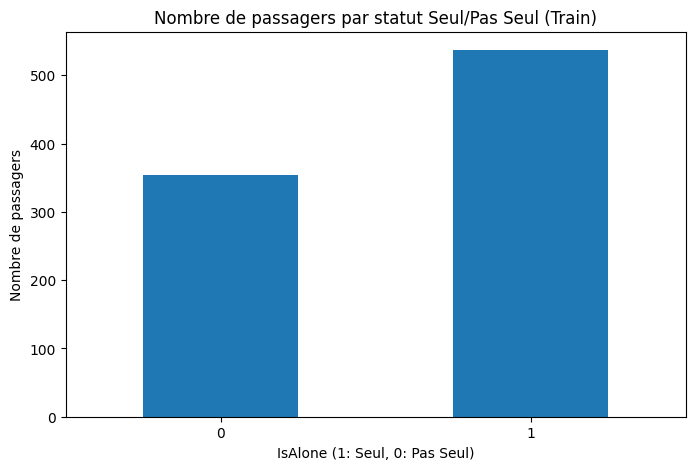

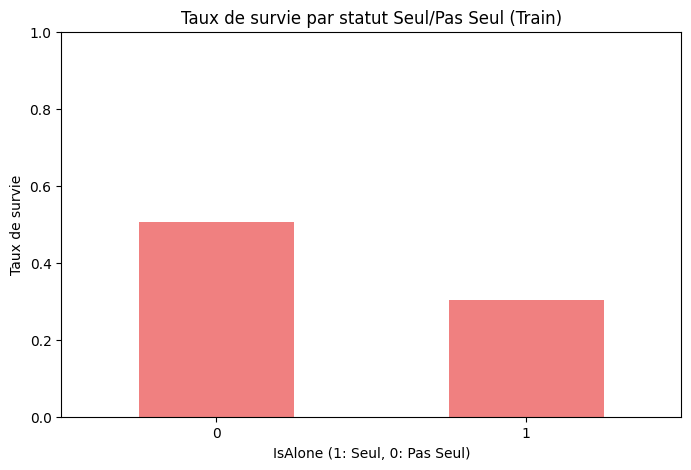

In [28]:
# Visualiser le nombre de personnes par statut IsAlone pour train
plt.figure(figsize=(8, 5))
train['IsAlone'].value_counts().sort_index().plot(kind='bar')
plt.title('Nombre de passagers par statut Seul/Pas Seul (Train)')
plt.xlabel('IsAlone (1: Seul, 0: Pas Seul)')
plt.ylabel('Nombre de passagers')
plt.xticks(rotation=0)
plt.show()

# Visualiser le taux de survie par statut IsAlone pour train
plt.figure(figsize=(8, 5))
train.groupby('IsAlone')['Survived'].mean().plot(kind='bar', color='lightcoral')
plt.title('Taux de survie par statut Seul/Pas Seul (Train)')
plt.xlabel('IsAlone (1: Seul, 0: Pas Seul)')
plt.ylabel('Taux de survie')
plt.xticks(rotation=0)
plt.ylim(0, 1) # Set y-axis limit from 0 to 1 for survival rate
plt.show()

2.7 Calculer l'information mutuelle sur les données train.

Attention : Il y a des données continues et des données discrètes

Ignorer les colonnes Name, Ticket et Cabin

In [1]:
# Select features and target variable, excluding specified columns
features = train.drop(['Survived', 'Name', 'Ticket', 'Cabin', 'PassengerId'], axis=1)
target = train['Survived']

# Impute missing values for Age and Fare
features['Age'].fillna(features['Age'].median(), inplace=True)
features['Fare'].fillna(features['Fare'].median(), inplace=True)

# Convert categorical features to dummy variables
features_processed = pd.get_dummies(features, columns=['Sex', 'Embarked'], drop_first=True)

# Identify discrete and continuous features after processing
# Assuming Pclass, SibSp, Parch, FamilySize, IsAlone, Sex_male, Embarked_Q, Embarked_S are discrete
discrete_features = ['Pclass', 'SibSp', 'Parch', 'FamilySize', 'IsAlone', 'Sex_male', 'Embarked_Q', 'Embarked_S']
# Assuming Age and Fare are continuous
continuous_features = ['Age', 'Fare']

# Ensure the identified features exist in the processed dataframe
discrete_features = [col for col in discrete_features if col in features_processed.columns]
continuous_features = [col for col in continuous_features if col in features_processed.columns]


# Calculate mutual information for discrete features
mi_discrete = mutual_info_regression(features_processed[discrete_features], target, discrete_features=True)
mi_discrete = pd.Series(mi_discrete, name="Mutual Information", index=discrete_features)

# Calculate mutual information for continuous features
mi_continuous = mutual_info_regression(features_processed[continuous_features], target)
mi_continuous = pd.Series(mi_continuous, name="Mutual Information", index=continuous_features)


# Combine mutual information scores
mutual_info = pd.concat([mi_discrete, mi_continuous]).sort_values(ascending=False)

# Display the mutual information scores
print("Mutual Information Scores:")
print(mutual_info)

NameError: name 'train' is not defined

2.8 Afficher dans un graphique les scores d'information mutuelle par feature

### Question 1 : La variable Classe est-elle utile pour prévoir la survie ? Pourquoi ?



### Question 2 : Même question pour la variable Sex


### Question 3 : Comment traiter le variables liées à la famille du passager ?





## 3. Traitement des données manquantes (à faire sur les données Train et Test)

3.1 La variable "Embarked" possède des valeurs nulles, compléter par la valeur majoritaire (S).

3.2 Afficher l'influence du port d'embarquement sur la Survie

3.3 La variable "Fare" (prix du ticket) possède des valeurs manquantes. Remplacer ces valeurs par la valeur médiane.

3.4 Créer une variable CategoricalFare Découpant la valeur de ticket en 4 catégories de tailles à peu près égales.

3.5 Analyser l'effet de ces catégories de prix de ticket sur la survie.

3.6 Combien de valeurs d'Age manquent ? Complète par des valeurs entières aléatoires entre (moyenne - écart type) et (moyenne + écart type).

3.7 Créer une variable CategoricalAge Découpant la valeur d'age en 5 tranches d'age de même taille.

3.8 Analyser l'effet de ces catégories d'age sur la survie.

### Question 1 : Classer les variables par ordre d'intérêt

## 4 : Traitement de features complexes

4.1 : Le nom permet de retrouver le titre du passager. Trouver les titres lorsqu'ils existent.

4.2 : En utilisant la fonction pandas crosstab, afficher pour train le nombre d'occurences par titres (en ligne) et par sexe (en colonne)

4.3 :
Remplacer 'Melle et 'Ms' par 'Miss'

Remplacer 'Mme' par 'Mrs'

Creer une valeur "Rare" pour les autres titres avec moins de 10 occurences.

Calculer ensuite le taux de survie par titre

## 5. Mise en forme des données non numériques

5.1 Attribuer une valeur numérique au Genre. Par exemple 0 pour 'female' et 1 pour 'male'

5.2 : Attribuer une valeur pour les possibilités de la variable "Title" ('Master','Miss','Mr','Mrs','Rare')

5.3 Remplacer les titres manquant par 0, et attribuer à la colonne le type entier

5.4 Attribuer une valeur numérique aux 4 catégories de la variable Fare

5.5 Attibuer une valeur numérique au Port d'embarquement (Embarked)

5.6 Supprimer les features inutiles

5.7 Afficher les infos pour les deux datasets

5.8 Sauver les deux datasets dans des fichier csv. Eviter d'écrire un index (n° de ligne)